Q3

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

Part1

In [263]:
digits_df = pd.read_csv('digits.csv')
_201th_row = digits_df.iloc[-2]
_202th_row = digits_df.iloc[-1]
digits_df = digits_df.drop([200, 201])
# _202th_row['pixel683']
# _201th_row['pixel684']
digits_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Part2

In [264]:
def make_binary(num):
    if (num < 128):
        return 0
    return 1
label_col = digits_df.iloc[:, 0]
digits_df= digits_df.applymap(make_binary)
digits_df['label'] = label_col
digits_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Part3

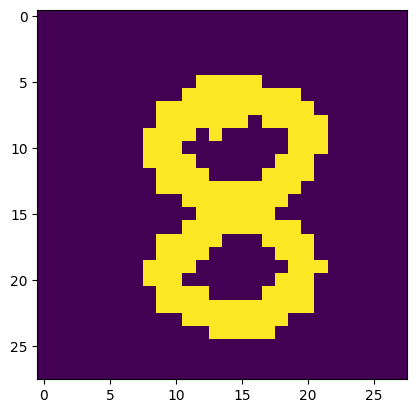

In [265]:
selected_pic = digits_df.iloc[16 , 1:]
reshaped_selected_pic = selected_pic.values.reshape(28,28)
plt.imshow(reshaped_selected_pic)
plt.show()


Part4

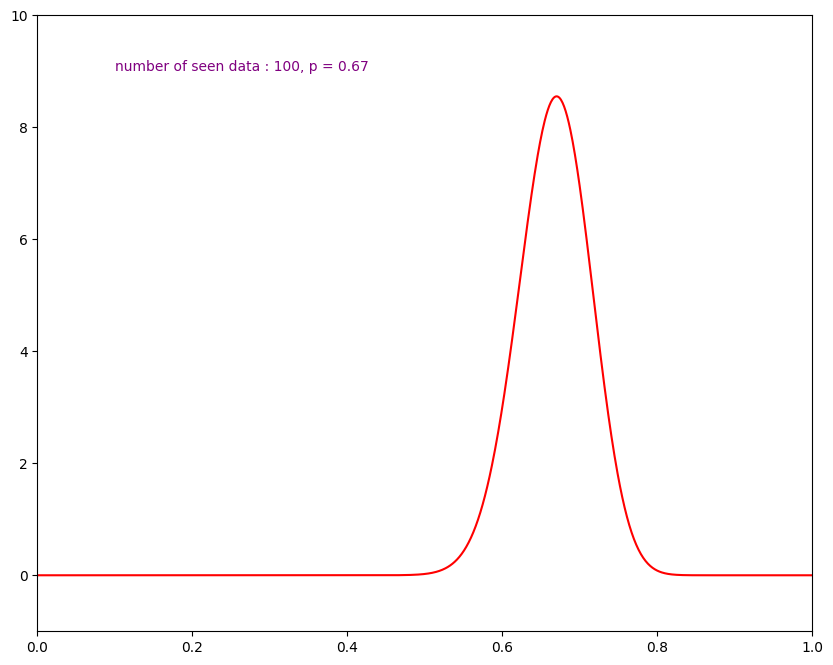

finally after 100 update, we have p ~= 0.669


<Figure size 1000x800 with 0 Axes>

In [266]:
# you need these imports
from time import sleep
from IPython import display

t = 1000
p = np.linspace(0, 1, t)
fy = stats.beta.pdf(p, a=1, b=1)
print(p)

def update(fy: np.array, n: bool) -> np.array:
    p = np.linspace(0, 1, t)
    # calculate P(N = n| Y = p) which is a bernouli distribution
    if (n == 1):
        pny = p
    elif (n == 0):
        pny = 1-p
    # calculate integral(0 -> 1) fy * pny
    integral = 1/t * np.sum(fy * pny)
    post = pny * fy / integral
    return post


plt.figure(figsize=(10, 8))
for i in range(100):
    n = digits_df[digits_df['label'] == 8].iloc[i,
                                                digits_df.columns.get_loc('pixel404')]
    fy = update(fy, n)

    # dynamic plot
    plt.plot(p, fy, 'r', label='1')
    plt.ylim(-1, 10)
    plt.xlim(0, 1)
    plt.text(
        0.1, 9, f'number of seen data : {i + 1}, p = {fy.argmax() / t :.2f}', color='purple')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    sleep(0.05)
    
print(f'finally after 100 update, we have p ~= {fy.argmax() / t}')

Part5

In [267]:
eights_df = digits_df[digits_df['label'] == 8].drop('label', axis=1)
nines_df = digits_df[digits_df['label'] == 9].drop('label', axis=1)

P_X_Label8 = [eights_df[i].mean() for i in eights_df]
P_X_Label9 = [nines_df[i].mean() for i in nines_df]
print(P_X_Label8)
print(P_X_Label9)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.02, 0.02, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.02, 0.03, 0.03, 0.05, 0.09, 0.16, 0.15, 0.15, 0.15, 0.11, 0.06, 0.03, 0.03, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.02, 0.05, 0.06, 0.12, 0.22, 0.4, 0.51, 0.56, 0.58, 0.53, 0.51, 0.41, 0.21, 0.13, 0.07, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.03, 0.06, 0.11, 0.2, 0.29, 0.5, 0.63, 0.75, 0.78, 0.77, 0.77, 0.63, 0.55, 0.42, 0.29

Part6

In [281]:
def p_X_label8(X: list):
    res = 1
    for index in range(len(X)):
        if make_binary(X[index]) == 1:
            res *= P_X_Label8[index]
        else:
            res *= 1-P_X_Label8[index]
    return res


def p_X_label9(X: list):
    res = 1
    for index in range(len(X)):
        if make_binary(X[index]) == 1:
            res *= P_X_Label9[index]
        else:
            res *= 1-P_X_Label9[index]
    return res


_201th_pic = _201th_row[1:].values
_202th_pic = _202th_row[1:].values

def P_Label8(pic):
    return p_X_label8(pic) / (p_X_label8(pic)+p_X_label9(pic))

def P_Label9(pic):
    return p_X_label9(pic) / (p_X_label8(pic)+p_X_label9(pic))

def find_label(pic):
    if P_Label8(pic)>P_Label9(pic):
        return "This picture is 8"
    else:
        return "This picture is 9"
print(f'for 201th pic, probability of being 8 is about {P_Label8(_201th_pic)}\nand  probability of being 9 is about {P_Label9(_201th_pic)}\nso {find_label(_201th_pic)}') 
print()
print(f'for 202th pic, probability of being 8 is about {P_Label8(_202th_pic)}\nand  probability of being 9 is about {P_Label9(_202th_pic)}\nso {find_label(_202th_pic)}') 

for 201th pic, probability of being 8 is about 0.9997406457898158
and  probability of being 9 is about 0.00025935421018423725
so This picture is 8

for 202th pic, probability of being 8 is about 5.915116612170155e-19
and  probability of being 9 is about 1.0
so This picture is 9
